VIF formula
VIF  = 1/(1-Rsquare)
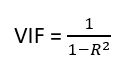
” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

**VIF (Variable Inflation Factors)**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("D:\Python\ML\Datasets\housing.csv")

In [16]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [17]:

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df)

,variables,VIF
0,RM,118.388090
1,LSTAT,8.209015
2,PTRATIO,64.575503
3,MEDV,28.218939


In [18]:
df1 = df.drop('RM',axis = 1)

In [19]:
calc_vif(df1)

,variables,VIF
0,LSTAT,7.930282
1,PTRATIO,24.497511
2,MEDV,9.869236


<AxesSubplot:>

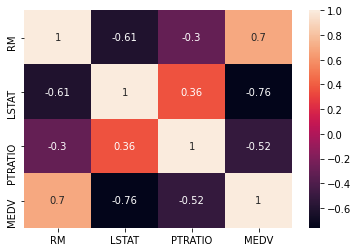

In [20]:
corr = df.corr()
import seaborn as sns
sns.heatmap(corr,annot = True)

<AxesSubplot:>

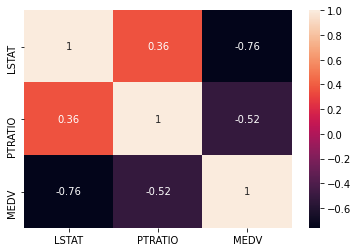

In [21]:
corr = df1.corr()
import seaborn as sns
sns.heatmap(corr,annot = True)

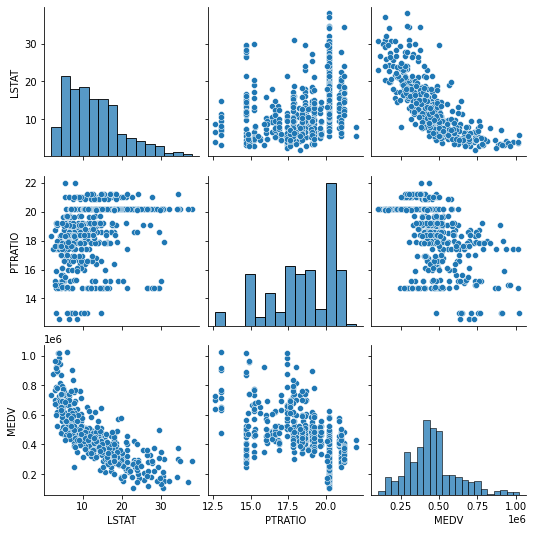

In [24]:
sns.pairplot(df1)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df1.drop('MEDV',axis = 1)
y = df1['MEDV']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
model = LinearRegression()
model.fit(xtrain,ytrain)
print('Accuracy: ',model.score(xtrain,ytrain))
print('Accuracy: ',model.score(xtest,ytest))

Accuracy:  0.6451390239821657
Accuracy:  0.6577256724370059


In [44]:
x = df.drop('MEDV',axis = 1)
y = df['MEDV']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
model = LinearRegression()
model.fit(xtrain,ytrain)
print('Accuracy: ',model.score(xtrain,ytrain))
print('Accuracy: ',model.score(xtest,ytest))

Accuracy:  0.7045431187274369
Accuracy:  0.7580987793930992
